# Defining the most suitable plan for telecom company

Preliminary tariff plans analysis needed based on the small customers selection sample. 
There are 500 'MegaLine' Users: who they are? where are they from? which plan have they been using? how many calls and messages each one sent for 2018 year? It is necessary to conduct Users' behavior analysis and make a conclusion which plan is the most suitable one.

Plans description

Plan «Smart»
* Monthly payment: 550 RUR
* Included: 500 minutes talk time; 50 SMS & 15 GB of internet traffic
* Services cost in excess of the plan: 
1. 1 minute talk: 3 RUR ('MegaLine' always rounds numbers up for minutes and megabytes. If the user has been talking just for 1 second then it is counted as 1 whole minute in the plan);
2. SMS: 3 RUR;
3. 1 GB of internet-traffic: 200 RUR;

Plan «Ultra»
* Monthly payment: 1950 RUR
* Included: 3000 minutes talk time; 1000 SMS & 30 GB of internet traffic
* Services cost in excess of the plan:
1. 1 minute talk: 1 RUR
2. SMS: 1 RUR;
3. 1 GB of internet-traffic: 150 RUR

## Examining data from a file

Importing all the data available, then we will decide on the most suitable data aggregation approach.
Lets convert date column to the datetime format for all the tables & add 'month' column to enable grouping tables based on the user and month.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

'MegaLine' always rounds up seconds to minutes so every call duration will be rounded upwards.

In [2]:
calls= pd.read_csv('calls.csv')
calls['duration'] = np.ceil(calls['duration'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = calls['call_date'].astype('datetime64[M]')
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,2018-07-01
1,1000_1,2018-08-17,0.0,1000,2018-08-01
2,1000_2,2018-06-11,3.0,1000,2018-06-01
3,1000_3,2018-09-21,14.0,1000,2018-09-01
4,1000_4,2018-12-15,6.0,1000,2018-12-01


In [4]:
internet = pd.read_csv('internet.csv')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].astype('datetime64[M]')
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
 5   month         149396 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 6.8+ MB


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,2018-11-01
1,1,1000_1,1052.81,2018-09-07,1000,2018-09-01
2,2,1000_2,1197.26,2018-06-25,1000,2018-06-01
3,3,1000_3,550.27,2018-08-22,1000,2018-08-01
4,4,1000_4,302.56,2018-09-24,1000,2018-09-01


In [5]:
messages = pd.read_csv('messages.csv')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages['message_date'].astype('datetime64[M]')
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 3.8+ MB


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


In [6]:
tariffs = pd.read_csv('tariffs.csv')
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True) #replaced the column name to then merge with the users table 
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff                 2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
users = pd.read_csv('users.csv')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Lets group tables, first based on the calls, messages and internet usage. All the tables contain common column user_id & month column added previously.

In [8]:
calls = calls.groupby(['user_id', 'month']).agg({'duration':'sum'}).reset_index()
internet = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()
messages = messages.groupby(['user_id', 'month']).agg({'message_date':'count'}).reset_index()

Now lets unite tables with calls, SMS, internet.

In [9]:
data = calls.merge(internet, on = ['user_id', 'month'], how = 'outer')
data = messages.merge(data, on = ['user_id', 'month'], how = 'outer')

Lets unite tables with plans info & customers info, then add to the main data.

In [10]:
data_users_tariffs = tariffs.merge(users, on='tariff', how = 'outer')
data = data_users_tariffs.merge(data, on = ['user_id'], how = 'outer')
data.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,age,churn_date,city,first_name,last_name,reg_date,month,message_date,duration,mb_used
0,50,15360,500,550,200,3,3,smart,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,2018-11-01,NaN,430.0,18429.34
1,50,15360,500,550,200,3,3,smart,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,2018-12-01,NaN,414.0,14036.66
2,50,15360,500,550,200,3,3,smart,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,2018-06-01,4.0,117.0,10856.82
3,50,15360,500,550,200,3,3,smart,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,2018-07-01,11.0,214.0,17580.10
4,50,15360,500,550,200,3,3,smart,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,2018-08-01,13.0,289.0,20319.26


Cheching retrieved dataset for values' gaps.

In [11]:
data.isna().sum()

messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
tariff                      0
user_id                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
month                       2
message_date              499
duration                   42
mb_used                    13
dtype: int64

Substitude gaps with 0 in month,message_date, duration, mb_used, because the subscriber idd not use services.
That is not needed to substitude gaps in churn_date, because once there is a value gap then the plan was in effect for the moment of data upload.

In [12]:
data.loc[data['month'].isna(), 'month'] = data['month'].fillna(0)
data.loc[data['message_date'].isna(), 'message_date'] = data['message_date'].fillna(0)
data.loc[data['duration'].isna(), 'duration'] = data['duration'].fillna(0)
data.loc[data['mb_used'].isna(), 'mb_used'] = data['mb_used'].fillna(0)

Secton 1 conclusion: there is a common table was made from 5 initial ones in order to enable further analysis, data is grouped based on user_id and month of operations performing. Data columns in all the tables are converted to the format needed, there is a month column added for grouping enablement. Data gaps are filled with 0 where needed.
There are calls with zero-duration , there is no need to delete/substitude them bcs those are missed calls. 

## Calculations and adding results to the table

In the previous section there calculations made for every customer: 
* quantity of calls made & minutes spent by months (with rounding seconds up to minutes);
* quantity of messages sent by months;
* volume of internet-traffic spent by months;

Lets calculate monthly revenue for each user: the difference of free limit from summarized calls quantity, messages and internet traffic; remainder lets multiply by the value from the plan; lets add subscription fee, corresponding to the plan.

In [13]:
# calculating overspending (overdrafts) for every user for calls
data['minutes_over'] = (data['duration'] - data['minutes_included']) * data['rub_per_minute']
# removing negative drafts
data.loc[data['minutes_over'] < 0, 'minutes_over'] = 0
# calculating overspending (overdrafts) by every user for SMS
data['messages_over'] = (data['message_date'] - data['messages_included']) * data['rub_per_message']
data.loc[data['messages_over'] < 0, 'messages_over'] = 0
# calculating overspending (overdrafts) by every user for internet, traffic should be converted into GB and rounded upwards
data['internet_over'] = np.ceil((data['mb_used'] - data['mb_per_month_included'])/1024) * data['rub_per_gb']
data.loc[data['internet_over'] < 0, 'internet_over'] = 0
#calculating revenue
data['revenue'] = data['minutes_over'] + data['messages_over'] + data['internet_over'] + data['rub_monthly_fee']
pd.set_option('display.max_columns', None)
data.tail()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,age,churn_date,city,first_name,last_name,reg_date,month,message_date,duration,mb_used,minutes_over,messages_over,internet_over,revenue
3211,1000,30720,3000,1950,150,1,1,ultra,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,2018-08-01 00:00:00,13.0,92.0,2614.07,0.0,0.0,0.0,1950.0
3212,1000,30720,3000,1950,150,1,1,ultra,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,2018-09-01 00:00:00,82.0,813.0,33067.62,0.0,0.0,450.0,2400.0
3213,1000,30720,3000,1950,150,1,1,ultra,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,2018-10-01 00:00:00,82.0,1030.0,29363.00,0.0,0.0,0.0,1950.0
3214,1000,30720,3000,1950,150,1,1,ultra,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,2018-11-01 00:00:00,79.0,954.0,38939.11,0.0,0.0,1350.0,3300.0
3215,1000,30720,3000,1950,150,1,1,ultra,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,2018-12-01 00:00:00,84.0,1031.0,23426.76,0.0,0.0,0.0,1950.0


Section 2 conclusion: monthy revenue calculated for every user taking into account 'MegaLine' services' conditions: internet payment is calculated for GB, calls' seconds rounded up to minutes. If user did not go out of stated boundaries for calls/sms/internet, then the User's revenue is equal to monthly plan payment.

## Data analysis & description

Users' behavior description in the selection: amount of talking minutes, amount of messages and internet traffic volume required for Users of every monthly plan.

Claculating average quantity, dispersion and standard deviation of talking minutes for every plan.

In [14]:
data.groupby('tariff').agg({'duration': ['mean', 'var', 'std']}).round(2)

duration                   
           mean        var     std
tariff                            
smart    417.75   36281.39  190.48
ultra    526.09  101052.49  317.89

Statistical data for 'Smart' plan calls.

In [15]:
data[data['tariff'] == 'smart']['duration'].describe()

count    2230.000000
mean      417.747534
std       190.476754
min         0.000000
25%       282.000000
50%       421.500000
75%       545.000000
max      1435.000000
Name: duration, dtype: float64

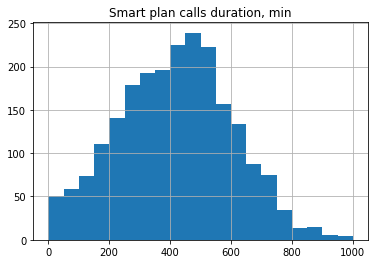

In [16]:
data[data['tariff'] == 'smart']['duration'].hist(bins=20, range=(1, 1000)).set_title("Smart plan calls duration, min");

Statistical data for 'Ultra' plan calls.

In [17]:
data[data['tariff'] == 'ultra']['duration'].describe()

count     986.000000
mean      526.089249
std       317.887549
min         0.000000
25%       282.500000
50%       518.000000
75%       751.750000
max      1673.000000
Name: duration, dtype: float64

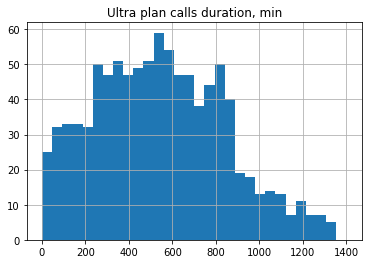

In [18]:
data[data['tariff'] == 'ultra']['duration'].hist(bins=30, range=(1, 1400)).set_title("Ultra plan calls duration, min");

Histogram of calls duration for both plans (comparement).

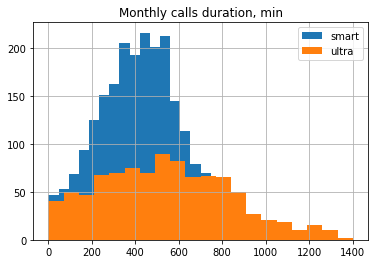

In [19]:
data[data['tariff'] == 'smart']['duration'].hist(bins=30, range=(1, 1400))
data[data['tariff'] == 'ultra']['duration'].hist(bins=20, range=(1, 1400))
plt.title('Monthly calls duration, min')
plt.legend(['smart', 'ultra'])
plt.show()

First of all, the average and median value of the tariff calls duration is distinguished: smart - average and median at the level of 400 minutes, ultra - 500 minutes. The deviation of values from the average value in smart is almost two times less than in ultra (190 and 318, respectively).

Calculating average quantity, dispersion and standart deviation of messages quantity for every plan.

In [20]:
data.groupby('tariff').agg({'message_date': ['mean', 'var', 'std']}).round(2)

message_date                
               mean      var    std
tariff                             
smart         33.37   796.96  28.23
ultra         49.31  2285.42  47.81

Statistical data for messages quantity for Smart plan.

In [21]:
data[data['tariff'] == 'smart']['message_date'].describe()

count    2230.000000
mean       33.369058
std        28.230396
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: message_date, dtype: float64

Statistical data for messages quantity for Ultra plan.

In [22]:
data[data['tariff'] == 'ultra']['message_date'].describe()

count    986.000000
mean      49.313387
std       47.806040
min        0.000000
25%        6.000000
50%       38.000000
75%       78.750000
max      224.000000
Name: message_date, dtype: float64

Histogram of messages quantity for both plans (comparement).

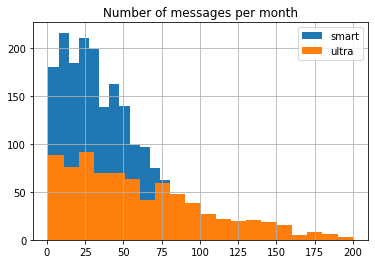

In [23]:
data[data['tariff'] == 'smart']['message_date'].hist(bins=30, range=(1, 200))
data[data['tariff'] == 'ultra']['message_date'].hist(bins=20, range=(1, 200))
plt.title('Number of messages per month')
plt.legend(['smart', 'ultra'])
plt.show()

The case is likwise with messages quantity: for Ultra plan the average & median if higher, than in Smart,  while the values' deviation from the average - almost two times less, so data is more homogeneous.

Calculating average quantity, dispersion and standart deviation of internet traffic usage for every plan.

In [24]:
data.groupby('tariff').agg({'mb_used': ['mean', 'var', 'std']}).round(2)

mb_used                        
            mean           var       std
tariff                                  
smart   16201.12  3.456484e+07   5879.19
ultra   19449.06  1.020321e+08  10101.10

Statistical data for internet traffic usage for 'Smart' plan.

In [25]:
data[data['tariff'] == 'smart']['mb_used'].describe()

count     2230.000000
mean     16201.118655
std       5879.187315
min          0.000000
25%      12630.035000
50%      16505.475000
75%      20042.107500
max      38552.450000
Name: mb_used, dtype: float64

Statistical data for internet traffic usage for 'Ultra' plan.

In [26]:
data[data['tariff'] == 'ultra']['mb_used'].describe()

count      986.000000
mean     19449.059970
std      10101.095459
min          0.000000
25%      11748.585000
50%      19304.020000
75%      26835.885000
max      49745.690000
Name: mb_used, dtype: float64

Histogram on internet usage for both plans (comparement).

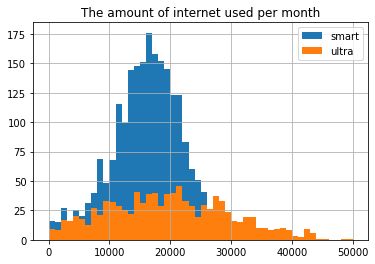

In [27]:
data[data['tariff'] == 'smart']['mb_used'].hist(bins=50, range=(1, 50000))
data[data['tariff'] == 'ultra']['mb_used'].hist(bins=50, range=(1, 50000))
plt.title('The amount of internet used per month')
plt.legend(['smart', 'ultra'])
plt.show()

Used internet traffic scatter from the average value in Ultra is also two time bigger than the standart Smart plan deviation. In average, users consume more internet traffic in Ultra plan, than in Smart plan (19k mb and 16k mb accordingly). 

Lets see now statisitcal indicators for revenue based on the plan; calculate the average, dispersion and revenue standart deviation for each Plan.

In [28]:
data.groupby('tariff').agg({'revenue': ['mean', 'var', 'std']}).round(2)

revenue                   
           mean        var     std
tariff                            
smart   1289.64  669730.76  818.37
ultra   2070.03  141387.71  376.02

Statistical data for Smart plan revenue.

In [29]:
data[data['tariff'] == 'smart']['revenue'].describe()

count    2230.000000
mean     1289.641704
std       818.370799
min       550.000000
25%       550.000000
50%      1021.000000
75%      1750.000000
max      6770.000000
Name: revenue, dtype: float64

Statistical data for Ultra plan revenue.

In [30]:
data[data['tariff'] == 'ultra']['revenue'].describe()

count     986.000000
mean     2070.030426
std       376.015578
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64

Revenues histogram for both Plans (comparement).

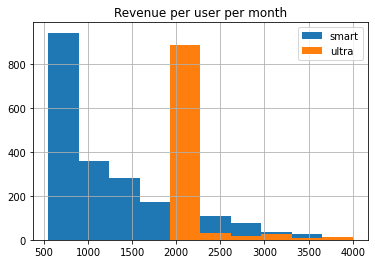

In [31]:
data[data['tariff'] == 'smart']['revenue'].hist(bins=10, range=(550, 4000))
data[data['tariff'] == 'ultra']['revenue'].hist(bins=10, range=(550, 4000))
plt.title('Revenue per user per month')
plt.legend(['smart', 'ultra'])
plt.show()

It is more interesting for revenue: standart deviation in Smart plan is 2 times higher than in Ultra, while the average monthly revenue for a User is two times higher than the plan price. Median revenue value in Ultra plan is correspondent to the subsrption fee. Consequently, most of the Ultra users have enough minutes, sms and internet traffic allocated in the plan, while for Smart users those amounts are not enough, and in average it is needed to pay the same amount more (the amount as the plan price).

## Hypothesis testing

Hypotheses:
* the average revenue of users of the "Ultra" and "Smart" tariffs differ;
* the average revenue of users from Moscow differs from the revenue of users from other regions.

1: Testing the hypothesis about the equality of the average revenue of users of two tariffs.

Formulating the null hypothesis H₀: The average revenue of users of the "Ultra" and "Smart" tariffs are equal.

Alternative hypothesis H₁: The average revenue of users of "Ultra" and "Smart" tariffs differ.

In [32]:
from scipy import stats as st
revenue_ultra = data[data['tariff'] == 'ultra']['revenue']
revenue_smart = data[data['tariff'] == 'smart']['revenue']

alpha = 0.01 # critical level of statistical significance
# if p-value is less than it, the hypothesis will be rejected

results = st.ttest_ind(revenue_ultra, revenue_smart)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value:  8.081909555489933e-161
Rejecting the null hypothesis


**Conclusion:**

The resulting p-value indicates that the probability of getting the same average revenues for two tariffs is practically zero (and less than the given statistical significance level of 1%), which allows us to reject the null hypothesis in favor of the alternative one: the average revenues of the tariffs are not equal.

2: Testing the hypothesis about the equality of the average revenue of users from Moscow and other regions.

The null hypothesis H₀: The average revenue of users in Moscow and other regions is equal to.

Alternative hypothesis H₁: The average revenue of users in Moscow and other regions differ.

In [33]:
revenue_moscow = data[data['city'] == 'Москва']['revenue']
revenue_region = data[data['city'] != 'Москва']['revenue']

alpha = 0.01 # critical level of statistical significance
# if p-value is less than it, the hypothesis will be rejected

results = st.ttest_ind(revenue_ultra, revenue_smart)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value:  8.081909555489933e-161
Rejecting the null hypothesis


In [34]:
data.query('city == "Москва"').agg({'revenue': ['mean', 'median', 'var', 'std']}).round(2)

,revenue
mean,1546.71
median,1750.00
var,565636.47
std,752.09


In [35]:
data.query('city != "Москва"').agg({'revenue': ['mean','median', 'var', 'std']}).round(2)

,revenue
mean,1524.73
median,1583.00
var,654069.57
std,808.75


**Conclusion:**

We reject the null hypothesis about the equality of the average revenue per user in Moscow and the regions, the probability of getting the same average in these two samples is less than the established statistical significance of 1% and is close to 0.

## General conclusion

On a small sample of Megaline's clients of 500 users, an analysis of the Smart and Ultra tariffs was carried out. The following results are obtained:

* users of the "Ultra" tariff have more calls, the number of sent messages and the amount of Internet used per month on average than the users of the "Smart" tariff

* the standard deviation from the average value in the "Ultra" tariff in terms of calls, SMS and Internet is almost twice as high as that of the users of the "Smart" tariff, i.e. the spread of data in the "Ultra" tariff is greater.

* the average revenue per user in the "Ultra" tariff is two times higher than the average revenue in the "Smart" tariff. At the same time, in the "Smart" tariff, the spread of data on revenue is more than 2 times higher than the standard deviation of revenue in the "Ultra" tariff. This is due to the fact that the median value of the Ultra tariff revenue corresponds to the monthly subscription fee in 1950 rubles, i.e. most users have enough limits for calls, SMS and the Internet, and do not have to pay extra. And for Smart users, the opposite is true: the average revenue is 1290 rubles. twice the established subscription fee of 550 rubles.

Two hypotheses were tested:

1. On the equality of the average revenue of two tariffs
2. On equality of average revenue in Moscow and other regions

Both "null" hypotheses about the equality of means are rejected, because average revenues by tariffs and by Moscow and regions are not equal with a probability of more than 99%.

Based on the data obtained, it is possible to answer the customer's question (which tariff brings more money) as follows: on average, the monthly revenue per user of the "Ultra" tariff is almost twice the revenue of the "Smart" tariff: 2070 rubles. and 1290 r. Accordingly, the "Ultra" tariff can be considered more profitable. However, this project analyzes the average revenue per user on a sample of 500 people. It would be interesting to compare the total monthly sales volume for both tariffs so that not only the price factor but also the volume factor is included in the analysis. It is possible that in this case the result will change, and the cheaper "Smart" tariff will bring more money due to the larger volume of sales.